In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

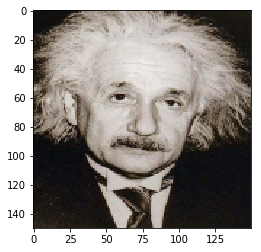

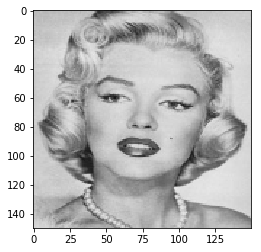

<Figure size 432x288 with 0 Axes>

In [17]:
img1 = cv2.resize(plt.imread('einstein.bmp'),(150,150))
img2 = cv2.resize(plt.imread('marilyn.bmp'),(150,150))

plt.imshow(img1)
plt.figure()
plt.imshow(img2)
plt.figure()

# def rgb2gray(rgb):
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
#     return gray

img1r = img1[:,:,0]
img1g = img1[:,:,1]
img1b = img1[:,:,2]

img2r = img2[:,:,0]
img2g = img2[:,:,1]
img2b = img2[:,:,2]

In [18]:
img1rFT = np.fft.fft2(img1r)
img1rFT = np.fft.fftshift(img1rFT)
img1gFT = np.fft.fft2(img1g)
img1gFT = np.fft.fftshift(img1gFT)
img1bFT = np.fft.fft2(img1b)
img1bFT = np.fft.fftshift(img1bFT)
img2rFT = np.fft.fft2(img2r)
img2rFT = np.fft.fftshift(img2rFT)
img2gFT = np.fft.fft2(img2g)
img2gFT = np.fft.fftshift(img2gFT)
img2bFT = np.fft.fft2(img2b)
img2bFT = np.fft.fftshift(img2bFT)

# plt.imshow(np.real(np.log10(np.absolute(img1rFT))+np.ones(img1rFT.shape)),cmap="gray")
# plt.figure()
# plt.imshow(np.real(np.log10(np.absolute(img2rFT))+np.ones(img2rFT.shape)),cmap="gray")

In [19]:
alpha = 200.0
beta = 3500000.0

In [20]:
img1rFT[np.absolute(img1rFT)<alpha] = 0
img1gFT[np.absolute(img1gFT)<alpha] = 0
img1bFT[np.absolute(img1bFT)<alpha] = 0

img1rFT = np.fft.ifftshift(img1rFT)
img1gFT = np.fft.ifftshift(img1gFT)
img1bFT = np.fft.ifftshift(img1bFT)

In [21]:
img2rFT[np.absolute(img2rFT)>beta] = 0
img2gFT[np.absolute(img2gFT)>beta] = 0
img2bFT[np.absolute(img2bFT)>beta] = 0

# plt.imshow(np.real(np.log10(np.absolute(img2rFT))+np.ones(img2rFT.shape)),cmap="gray")

img2rFT = np.fft.ifftshift(img2rFT)
img2gFT = np.fft.ifftshift(img2gFT)
img2bFT = np.fft.ifftshift(img2bFT)

In [22]:
img3rFT = np.zeros(img1rFT.shape,dtype=complex)
img3gFT = np.zeros(img1gFT.shape,dtype=complex)
img3bFT = np.zeros(img1bFT.shape,dtype=complex)

img3rFT = img1rFT + img2rFT
img3gFT = img1gFT + img2gFT
img3bFT = img1bFT + img2bFT

In [23]:
img3r = abs(np.fft.ifft2(img3rFT))
img3g = abs(np.fft.ifft2(img3gFT))
img3b = abs(np.fft.ifft2(img3bFT))

img3=[]
for i in range(img3r.shape[0]):
    img3.append([])
    for j in range(img3r.shape[1]):
        img3[i].append([img3r[i][j],img3g[i][j],img3b[i][j]])
img3=np.array(img3)

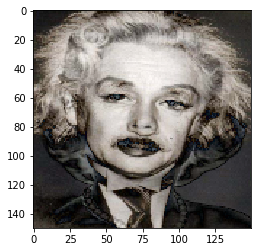

In [24]:

cv2.imwrite("HW_1_Q_1_output/makeup_after_before.png",img3)
plt.imshow(np.absolute(img3) / np.max(np.absolute(img3)))
plt.show()